# Metrics
(For Retrieval and Ranking)

Metrics can be offline (before live deployment) and online

## Online metrics

A/B testing, etc - out of scope for this document

## Offline Metrics

Two kinds - order unaware and order aware

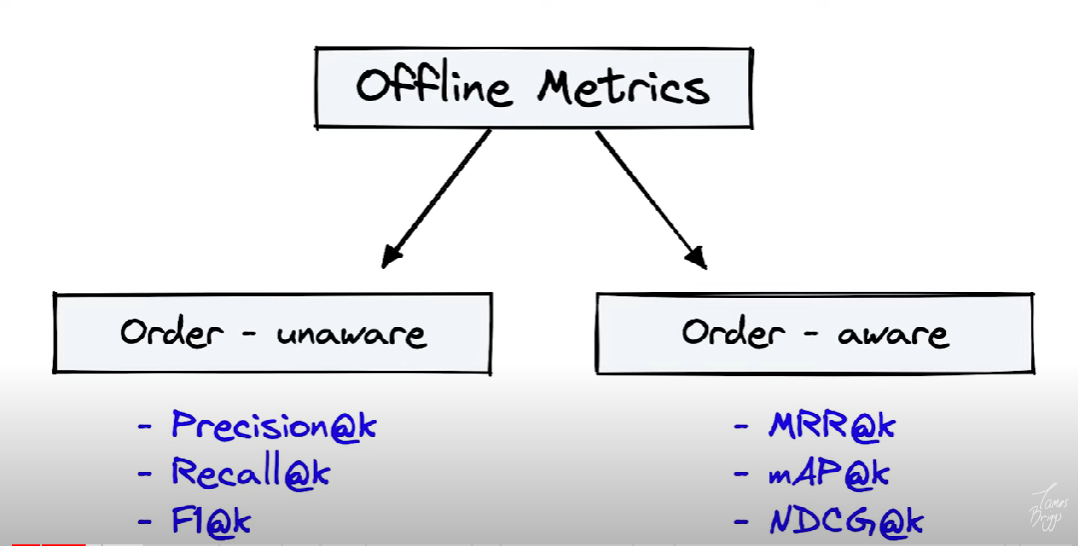


Order unaware - the exact order within the K retrieved vectors does not matter for the metric

Order aware - the exact order matters

### Recall @K - recall metric without considering order

In the top K search results, TP in top K/ (TP in top K + FN outside top K) = TP in top K/ total no of positives in dataset

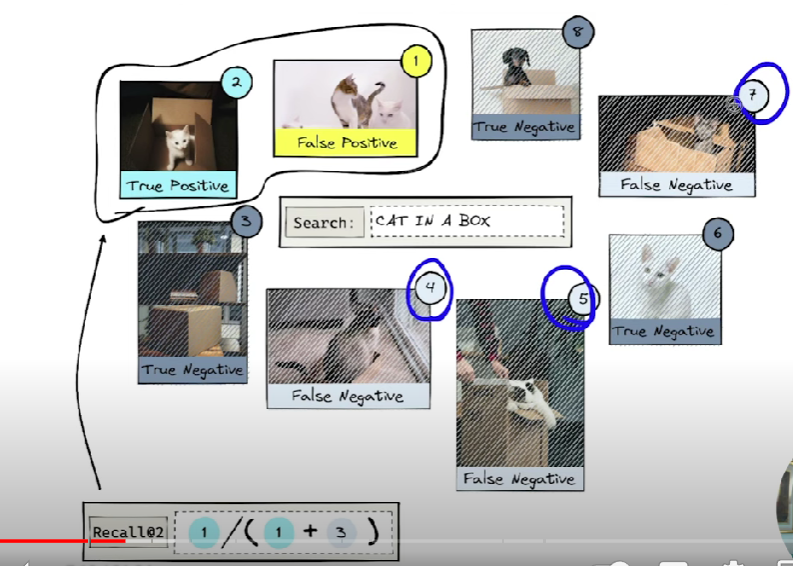

Recall@2 in the figure above = 1 / (1 + 3)  -> 1 TP among top 2 searches; 3 FN

### Disadvantage

Doesn't take order into account


A high recall@K might have terrible precision as you are giving too many false positives

### MRR @ k - considers order (Mean Reciprocal Rank)

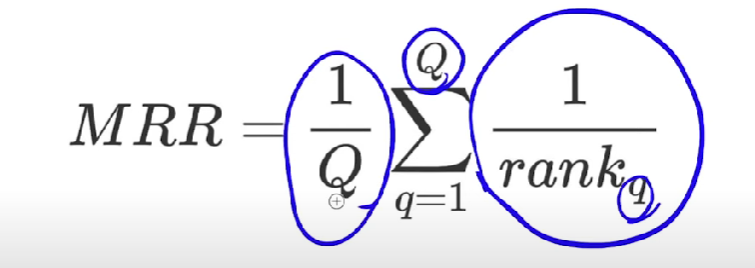

Q queries

rank-q is the rank of the first TP in the recommendations for query q

Highest possible (best) MRR@k is thus 1

### Precision @ K (does not consider order)
AND
### MAP @ K - considers order (Mean Average Precision)

Precision @ K - In the top K returned hits, TP / K = TP / (TP + FP)

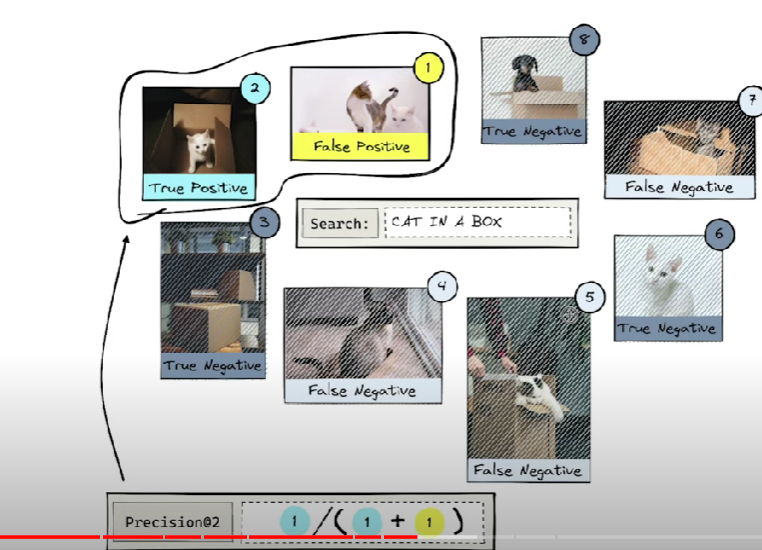

MAP @K

Let's start with defining average precision @K aka AP@K

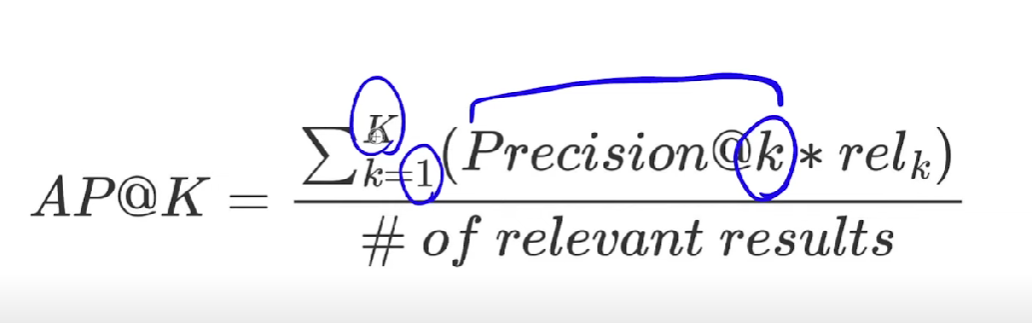


You're averaging precision @ k over multiple k values from 1 to K, multiplied by a relevance term . Relevance term just says, for a given k, is the kth prediction a TP (1) or Not (0)

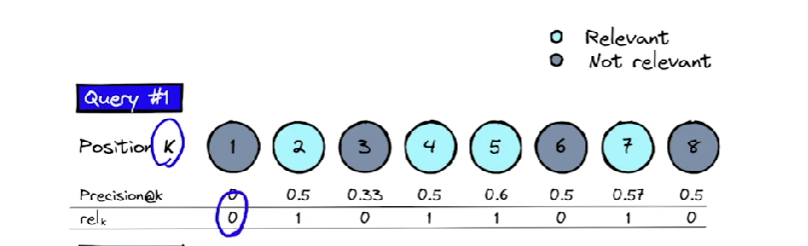

The denoninator No of relevant results is no of true positives in K

For the above diagram, here's AP@K
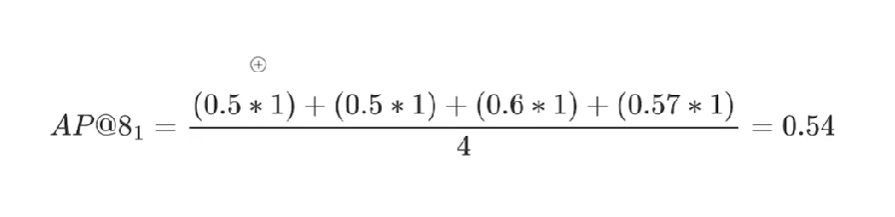

Averaging the AP@K over multiple queries will give MAP@K


Let's say we have 3 queries with the following average precision @K value

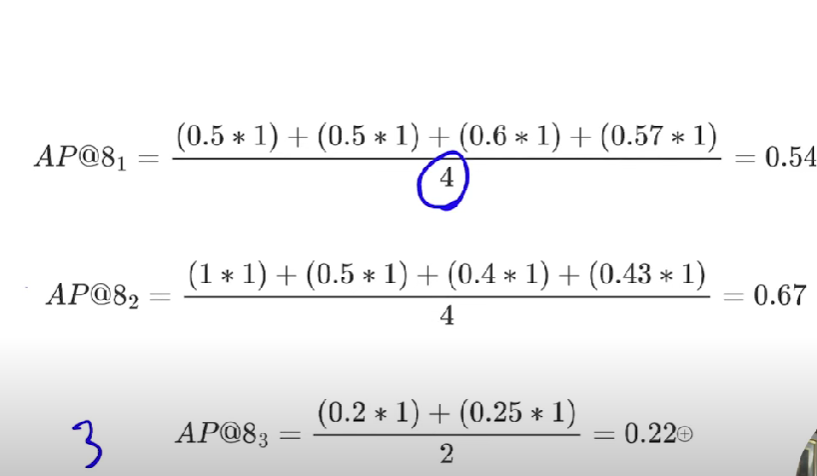


The MAP@K = 1/3 * (0.54 + 0.67 + 0.22 ) = 0.48

Highest possible value is 1

## NDCG @ K (Normalized distributed cumulative gain @ K - takes order into account)

Start with CG@K

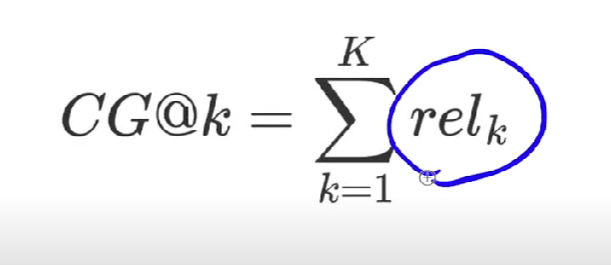

Sum of relevace at k for all k

Here, relevance is not a 0/1 necessarily unlike the MAP estimate, it can be a rank given as GT instead of just 1/0(for example 0,1,2,3,4 where 4 is highest rank, 0 lowest)

Example of relevance :

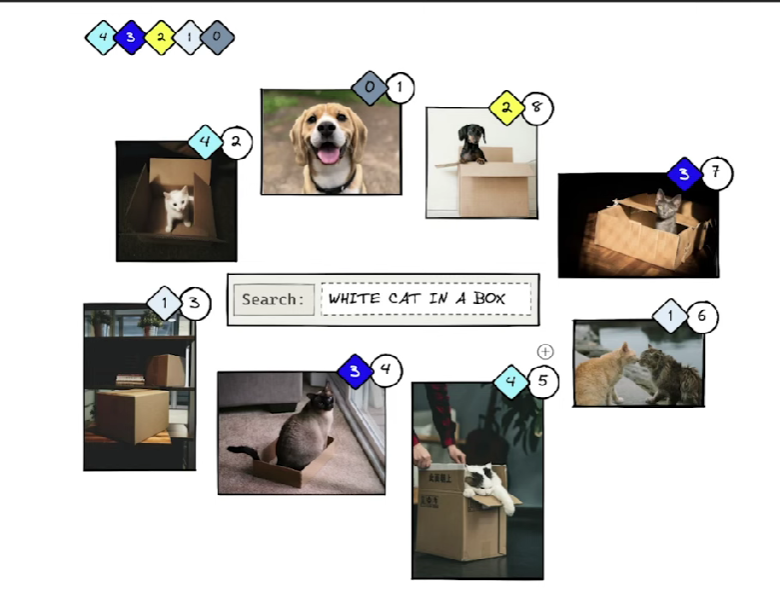

Given a query "white cat in box", the two images which are actually white cat in a box get highest relevance GT - 4

and lower relevant ones get lower scores. Dog gets 0 relevance score - no cat, no box, etc

Now, computing CG@2

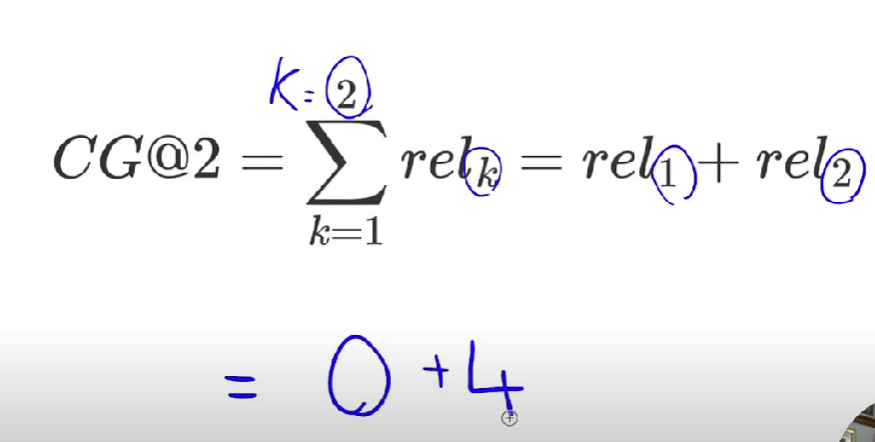 = 4


CG @ K by itself is not order aware

To make CG order aware, use Discounted cumulative gain (DCG) 
Has a discounting term in the denominator of each term of CG

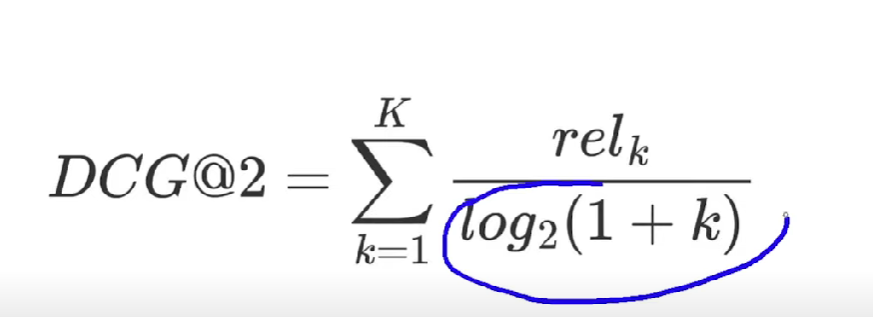


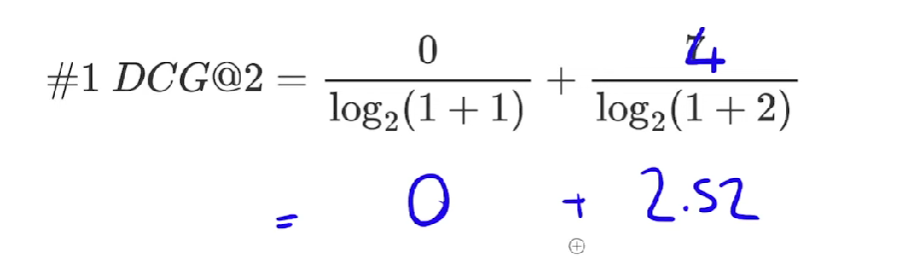

If you swap the rank order of the first two predictions, DCG changes (whereas CG did not)

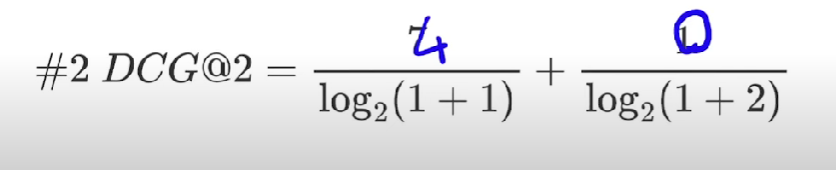



DCG does not have a range, it depends on relevance score, if you use 0-10 as relevance GT, DCG range will change

We will have to Normalize this to get NDCG to within 0 to 1 (1 perfect, 0 terrible)


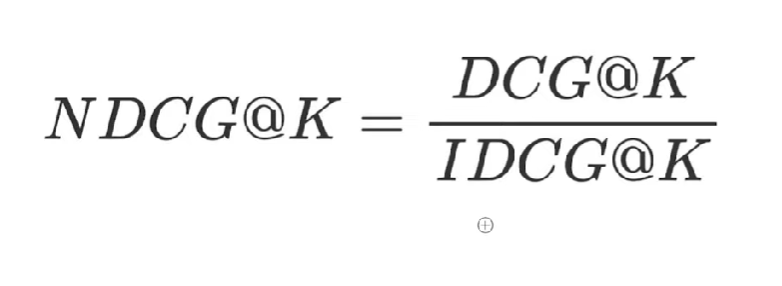

where IDCG@K is the Ideal (largest) DCG @K, occuring in an ideal state where most relevant GT is at 1st position/1st rank, next most relevant GT is at 2nd rank... lowest relevant GT is at Kth rank

Let's now compute IDCG@2 for the example above

Since there are 2 items with highest rank 4, The ideal case is if both these items are at rank 1 and 2

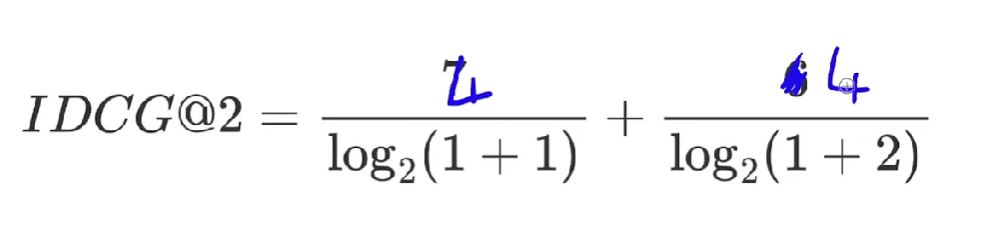
 = 4 + 2.52 = 6.52
 
 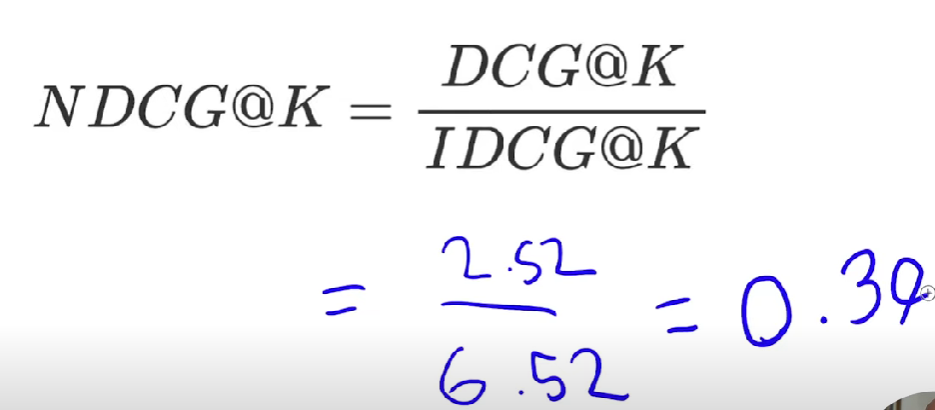


## References

https://www.youtube.com/watch?v=BD9TkvEsKwM&t=1s